In [3]:
# Import beautiful soup
from bs4 import BeautifulSoup
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

In [33]:
# A RESOLVER:
# * Clicar no botão 'mais' para expandir a descrição
# plus_button = driver.find_element(By.XPATH, '//button[@class="collapse__link link link-primary link--normal"]')
# plus_button.click()

# * Pegar quantidade de apartamentos do h2
# h2 = driver.find_element(By.XPATH, '//[@class="summary__title js-summary-title heading-regular heading-regular__bold align-left text-margin-zero results__title"]')
# total_apts = int(re.search('[0-9]+', h2.text).group())

In [4]:
# Get dict with info name and selector above (description, price, area, bedrooms, parking_lots, bathrooms)
tags = {'description': 'div', 'loc': 'h2', 'price': 'p', 'cond.': 'li', 'IPTU': 'li', 'area': 'li', 'bedrooms': 'li', 'parking_lots': 'li', 'bathrooms': 'li'}
selectors = {'description': 'collapse__content', 'loc': 'simple-card__address color-dark text-regular', 'price': 'simple-card__price js-price color-darker heading-regular heading-regular__bolder align-left', 'cond.': 'card-price__item condominium text-regular', 'IPTU': 'card-price__item iptu text-regular', 'area': 'feature__item text-small js-areas', 'bedrooms': 'feature__item text-small js-bedrooms', 'parking_lots': 'feature__item text-small js-parking-spaces', 'bathrooms': 'feature__item text-small js-bathrooms'}


In [11]:
driver = webdriver.Chrome()

max_price = 800000
url = 'https://www.zapimoveis.com.br/venda/apartamentos/rj+rio-de-janeiro+zona-sul+flamengo/?onde=,Rio%20de%20Janeiro,Rio%20de%20Janeiro,Zona%20Sul,Flamengo,,,neighborhood,BR%3ERio%20de%20Janeiro%3ENULL%3ERio%20de%20Janeiro%3EZona%20Sul%3EFlamengo,-22.936822,-43.175702,%3B,Rio%20de%20Janeiro,Rio%20de%20Janeiro,Zona%20Sul,Botafogo,,,neighborhood,BR%3ERio%20de%20Janeiro%3ENULL%3ERio%20de%20Janeiro%3EZona%20Sul%3EBotafogo,-22.951193,-43.180784,&transacao=Venda&tipo=Im%C3%B3vel%20usado&tipos=apartamento_residencial&precoMaximo='+str(max_price)+'&pagina=1'
driver.get(url)

elems = driver.find_elements(By.XPATH, "//*[@href]")
for elem in elems:
    print(elem.text)

print(len(elems))
driver.quit()



































Comprar
Alugar
Descobrir
Financiamento
Central de ajuda
Anunciar































Apartamentos à Venda




RJ
Apartamentos à venda em Rio de Janeiro
Zona Sul
Flamengo
Quer saber como é morar em Flamengo?
Acesse o guia do bairro.
Não encontrou o que buscava? Veja o que o ZAP recomenda para você!
ZAP Imóveis - O melhor lugar para venda seu apartamento. Anuncie Agora
Acessar guia do bairro
Política de Cookies
85


In [39]:
driver = webdriver.Chrome()

apts = []
max_price = 800000

url = 'https://www.zapimoveis.com.br/venda/apartamentos/rj+rio-de-janeiro+zona-sul+flamengo/?onde=,Rio%20de%20Janeiro,Rio%20de%20Janeiro,Zona%20Sul,Flamengo,,,neighborhood,BR%3ERio%20de%20Janeiro%3ENULL%3ERio%20de%20Janeiro%3EZona%20Sul%3EFlamengo,-22.936822,-43.175702,%3B,Rio%20de%20Janeiro,Rio%20de%20Janeiro,Zona%20Sul,Botafogo,,,neighborhood,BR%3ERio%20de%20Janeiro%3ENULL%3ERio%20de%20Janeiro%3EZona%20Sul%3EBotafogo,-22.951193,-43.180784,&transacao=Venda&tipo=Im%C3%B3vel%20usado&tipos=apartamento_residencial&precoMaximo='+str(max_price)+'&pagina=1'
driver.get(url)


# Get number of pages
total_apts = 6252
pages = int(total_apts/100) + 1

for page in range(pages):
    url = 'https://www.zapimoveis.com.br/venda/apartamentos/rj+rio-de-janeiro+zona-sul+flamengo/?onde=,Rio%20de%20Janeiro,Rio%20de%20Janeiro,Zona%20Sul,Flamengo,,,neighborhood,BR%3ERio%20de%20Janeiro%3ENULL%3ERio%20de%20Janeiro%3EZona%20Sul%3EFlamengo,-22.936822,-43.175702,%3B,Rio%20de%20Janeiro,Rio%20de%20Janeiro,Zona%20Sul,Botafogo,,,neighborhood,BR%3ERio%20de%20Janeiro%3ENULL%3ERio%20de%20Janeiro%3EZona%20Sul%3EBotafogo,-22.951193,-43.180784,&transacao=Venda&tipo=Im%C3%B3vel%20usado&tipos=apartamento_residencial&precoMaximo='+str(max_price)+'&pagina='+str(p)
    # Open page with selenium
    driver.get(url)

    cards = driver.find_elements(By.CLASS_NAME, 'simple-card__box')

    for card in cards:
        soup = BeautifulSoup(card.get_attribute('innerHTML'), 'html.parser')
        apt = {}
        for tag in tags:
            try:
                apt[tag] = soup.find(tags[tag], class_=selectors[tag]).text.strip()
                if tag != 'description' and tag != 'loc':
                    apt[tag] = str(apt[tag]).replace('.', '').replace('m²', '').replace('R$', '')
                    # Pegar primeiro número
                    apt[tag] = int(re.search('[0-9]+', apt[tag]).group())
            except Exception as e:
                apt[tag] = None
        apts.append(apt)

print(len(apts))

driver.quit()

6300


In [40]:
apts_df = pd.DataFrame(apts)
apts_df = apts_df[apts_df['price'].notnull()]
apts_df

,description,loc,price,cond.,IPTU,area,bedrooms,parking_lots,bathrooms
0,O Rio by YOO traz o equilíbrio perfeito entre ...,"Avenida Rui Barbosa, Flamengo",NaN,NaN,NaN,150,3,2.0,3
1,"Maison Laranjeiras - Apartamentos com 2, 3 e 4...","Rua das Laranjeiras, Laranjeiras",NaN,NaN,NaN,71,2,NaN,1
2,O Insight Flamengo é a grande novidade residen...,"Praia do Flamengo, Flamengo",561000.0,NaN,NaN,37,1,1.0,1
3,DNA Imóveis vende: Ótimo apartamento grudado a...,"Rua Voluntários da Pátria, Botafogo",525000.0,670.0,1161.0,41,1,NaN,2
4,"Maravilhoso 2 quartos sendo 1 suíte, vista liv...","Rua Marquês de Abrantes, Flamengo",NaN,1250.0,165.0,74,2,1.0,2
...,...,...,...,...,...,...,...,...,...
6295,"Excelente!!! Apartamento, claro, arejado e sil...","Rua General Severiano, Botafogo",780000.0,700.0,1290.0,52,2,NaN,1
6296,"vista aberta, predio tradicional muito bem cui...","Rua Marquês de Abrantes, Flamengo",760000.0,850.0,2200.0,90,2,NaN,2
6297,Águia Real Imóveis vende! Botafogo! Maravilhos...,"Rua São Clemente, Botafogo",750000.0,1160.0,2700.0,79,2,1.0,1
6298,Studios e 2 quartos em uma das maiores express...,"Rua Visconde de Ouro Preto, Botafogo",749000.0,600.0,1400.0,47,1,NaN,1


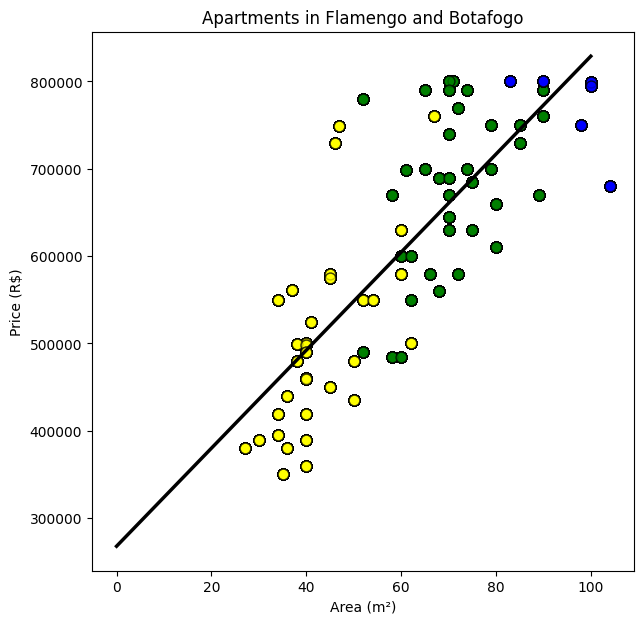

In [90]:
import matplotlib.pyplot as plt
import numpy as np

one_room = apts_df[apts_df['bedrooms'] == 1]
two_rooms = apts_df[apts_df['bedrooms'] == 2]
three_rooms = apts_df[apts_df['bedrooms'] == 3]


fig, ax = plt.subplots(figsize = (7, 7))

ax.scatter(one_room['area'], one_room['price'], s=60, alpha=0.7, c='yellow', edgecolors='black', linewidths=1, label='1 quarto')
ax.scatter(two_rooms['area'], two_rooms['price'], s=60, alpha=0.7, c='green', edgecolors='black', linewidths=1, label='2 quartos')
ax.scatter(three_rooms['area'], three_rooms['price'], s=60, alpha=0.7, c='blue', edgecolors='black', linewidths=1, label='3 quartos')

# Linear Regression to get the line
b, a = np.polyfit(apts_df['area'], apts_df['price'], deg=1)
xseq = np.linspace(0, 100, num=1000)
# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

plt.title('Apartments in Flamengo and Botafogo')
plt.xlabel("Area (m²)")
plt.ylabel("Price (R$)")

plt.show()

In [62]:
from sklearn.model_selection import train_test_split

predictors = apts_df[['area', 'bedrooms', 'bathrooms']]
target = apts_df['price']

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=40)

In [91]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

_preds_df = pd.DataFrame(dict(observed=y_test, predicted=y_pred))
_preds_df.head()

,observed,predicted
856,499000.0,479221.321568
3296,760000.0,765679.431002
5863,730000.0,743629.816521
2310,630000.0,666130.190157
1377,490000.0,564701.963545


In [76]:
from sklearn.metrics import mean_squared_error

print('Score: {}'.format(lr.score(X_test, y_test)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficients: {}'.format(lr.coef_))

Score: 0.6340637421239175
MSE: 6751423302.724063
Intercept: 254502.13267998752
Coefficients: [ 4409.92289618 23741.72143104 33400.39740156]


In [75]:
area = 56
bedrooms = 3
bathrooms = 2

pred_price = lr.intercept_ + area * lr.coef_[0] + bedrooms * lr.coef_[1] + bathrooms * lr.coef_[2]
print(pred_price)

639483.7739624197
